# Análise Comparativa de Modelos

- Conjunto de dados: `orange_quality` (Qualidade de Laranjas)
- Cientistas de Dados - Equipe Pandalytics:
  - Augusto Ferreira
  - Isabela Buzzo
  - Giulia Cunha

  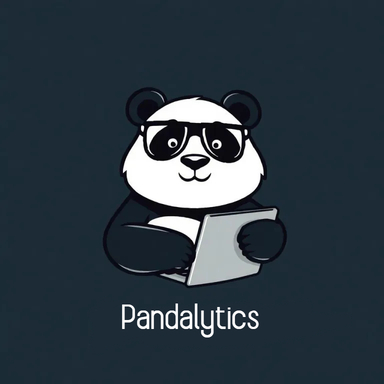

## Metodologia

O objetivo da seguinte análise é a comparação de diferentes modelos de aprendizado de máquina para a predição da qualidade de laranjas.

A metodologia utilizada foi estruturada nas seguintes etapas:

- Configuração do Experimento
  - Pré-processamento dos dados:
    - Tratamento de dados faltantes e discrepantes.
    - Codificação e normalização de variáveis.
    
  - Modelagem:
    - Adoção de validação cruzada.
    - Treinamento de modelos de regressão e classificação, com o objetivo de encontrar a melhor abordagem, visto que a variável-alvo em questão encaixava-se em ambos conceitos.

- Resultados e discussão:
  - Análise dos resultados obtidos com os modelos de classificação e regressão.

## Configuração do Experimento

In [ ]:
# @title Importações de bibliotecas

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown

# Pipelines e transformadores
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler,MinMaxScaler)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Modelagem
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,cross_validate, KFold, ShuffleSplit)
from sklearn.metrics import (mean_absolute_error, mean_squared_error, accuracy_score)
from scipy.stats import zscore
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# Modelos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
# Modelos de Regressão
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(transform_output="pandas")

In [ ]:
# @title Leitura dos dados
df = pd.read_csv("https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/orange_quality.csv")

In [ ]:
# @title Tradução das colunas para PT-BR

# Dicionário de renomeação
colunas_traduzidas = {
    "Size (cm)": "Tamanho (cm)",
    "Weight (g)": "Peso (g)",
    "Brix (Sweetness)": "Brix (Doçura)",
    "pH (Acidity)": "pH (Acidez)",
    "Softness (1-5)": "Maciez (1-5)",
    "HarvestTime (days)": "Tempo de Colheita (dias)",
    "Ripeness (1-5)": "Maturação (1-5)",
    "Color": "Cor",
    "Variety": "Variedade",
    "Blemishes (Y/N)": "Manchas (S/N)",
    "Quality (1-5)": "Qualidade (1-5)"
}

# Aplicando a renomeação
df = df.rename(columns=colunas_traduzidas)

# Opções de display do pandas para remover notação científica e zeros à direita
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
# @title Dicionário de dados
df_dict = pd.DataFrame([
    {
        "variavel": "Tamanho (cm)",
        "descricao": "Tamanho da laranja, em centímetros.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Peso (g)",
        "descricao": "Peso da laranja, em gramas.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Brix (Doçura)",
        "descricao": "Nível de doçura da laranja.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "pH (Acidez)",
        "descricao": "Nível de acidez.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Maciez (1-5)",
        "descricao": "Nível de maciez da laranja.",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Tempo de Colheita (dias)",
        "descricao": "Tempo necessário para colheita.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Maturação (1-5)",
        "descricao": "Estágio de amadurecimento da laranja.",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Cor",
        "descricao": "Tom de cor da laranja.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Variedade",
        "descricao": "Variedade da laranja.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Manchas (S/N)",
        "descricao": "Quantidade de danos na laranja.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Qualidade (1-5)",
        "descricao": "Nível de qualidade da laranja.",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    }
])

### Pré-processamento de dados

#### Tratamento de dados faltantes

In [ ]:
df.isnull().sum()

,0
Tamanho (cm),0
Peso (g),0
Brix (Doçura),0
pH (Acidez),0
Maciez (1-5),0
Tempo de Colheita (dias),0
Maturação (1-5),0
Cor,0
Variedade,0
Manchas (S/N),0


In [ ]:
# Avaliando os valores únicos de cada variável a procura de valores ausentes mascarados
for col in df.columns:
    display(f"Coluna: {col}")
    display(df[col].unique())
    display("-" * 30)

'Coluna: Tamanho (cm)'

array([ 7.5,  8.2,  6.8,  9. ,  8.5,  6.7,  7.2,  6.5,  8.8,  7.8,  9.5,
        8. ,  7. ,  9.2,  6.3,  8.7,  9.6,  7.4, 10. ,  8.1,  7.6,  9.8,
        7.9,  8.4,  8.3,  7.1,  7.7,  8.9,  6.2,  8.6,  7.3,  9.7,  6.4,
        6.6,  9.4,  6.1,  9.9,  9.1,  6. ,  9.3,  6.9])

'------------------------------'

'Coluna: Peso (g)'

array([180, 220, 150, 250, 210, 126, 160, 130, 240, 190, 270, 183, 200,
       140, 260, 120, 230, 218, 247, 170, 300, 205, 280, 215, 111, 177,
       185, 245, 110, 225, 165, 285, 175, 125, 135, 275, 105, 290, 255,
       235, 100, 145, 115, 158, 192, 127, 118, 202, 123, 143, 269, 152,
       184, 137, 236, 279, 293, 209, 246, 253, 298, 169, 252, 297, 243,
       108, 117, 234, 276, 155, 198, 122, 257, 157, 296, 187, 129, 292,
       281, 222, 139, 238, 264, 217, 294, 206, 274, 168, 106, 141, 176,
       256, 151, 258, 179, 288, 263, 204, 291, 259, 171, 182, 112, 273,
       283, 195, 261, 193, 277, 299, 162, 142, 138, 128, 197, 149, 237,
       146, 233, 248, 228, 267, 265, 189, 147, 131, 249, 251, 194, 196,
       282])

'------------------------------'

'Coluna: Brix (Doçura)'

array([12. , 10.5, 14. ,  8.5, 11.5,  9.1,  9. , 13.5,  7.5,  6. , 14.8,
       10. , 11. ,  9.5, 14.5,  8. , 14.1, 12.5,  7. ,  6.5, 13. ,  8.6,
       15. ,  5.5, 11.2, 12.6, 14.2,  8.1, 11.3, 14.3,  6.8,  6.7, 15.1,
       14.7,  6.4,  7.4, 12.4, 10.4, 11.1, 11.8, 15.9, 12.7, 12.2,  7.3,
       13.7,  9.3,  6.6, 10.6,  8.2, 14.6, 13.2,  9.2, 16. , 14.9,  7.7,
        7.6, 15.8, 13.4, 15.2, 10.2, 15.4, 13.9, 14.4, 11.9,  6.9, 11.4,
       12.1,  6.2,  8.4,  9.9, 13.6,  6.3,  9.8, 12.8, 13.1,  8.7, 10.9,
        7.2, 15.6,  6.1,  8.3, 15.7])

'------------------------------'

'Coluna: pH (Acidez)'

array([3.2 , 3.4 , 3.  , 3.8 , 3.3 , 3.5 , 2.8 , 4.  , 3.1 , 4.2 , 3.7 ,
       2.9 , 3.9 , 4.1 , 4.3 , 3.6 , 4.4 , 3.43, 3.72, 3.32, 3.29, 4.09,
       3.98, 2.82, 3.53, 3.67, 3.97, 3.33, 3.85, 2.86, 3.54, 3.36, 2.88,
       3.61, 3.41, 4.35, 2.92, 4.37, 2.97, 3.58, 4.33, 3.39, 3.17, 3.65])

'------------------------------'

'Coluna: Maciez (1-5)'

array([2. , 3. , 1. , 4. , 2.5, 3.5, 1.5, 5. , 4.5])

'------------------------------'

'Coluna: Tempo de Colheita (dias)'

array([10, 14,  7, 21, 12, 25,  9,  5, 18, 11, 24, 13,  8, 20,  6, 17, 23,
       16, 15, 19, 22,  4])

'------------------------------'

'Coluna: Maturação (1-5)'

array([4. , 4.5, 5. , 3.5, 2. , 3. , 2.5, 1. ])

'------------------------------'

'Coluna: Cor'

array(['Orange', 'Deep Orange', 'Light Orange', 'Orange-Red',
       'Yellow-Orange'], dtype=object)

'------------------------------'

'Coluna: Variedade'

array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', 'Hamlin',
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Washington Navel', 'Star Ruby', 'Tangerine',
       'Ambiance', 'California Valencia', 'Honey Tangerine',
       'Navel (Late Season)', 'Clementine (Seedless)', 'Temple',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Navel (Early Season)', 'Ortanique (Hybrid)'], dtype=object)

'------------------------------'

'Coluna: Manchas (S/N)'

array(['N', 'Y (Minor)', 'Y (Sunburn)', 'Y (Mold Spot)', 'Y (Bruise)',
       'Y (Split Skin)', 'Y (Sunburn Patch)', 'Y (Scars)',
       'Y (Minor Insect Damage)', 'Y (Bruising)', 'N (Minor)',
       'N (Split Skin)'], dtype=object)

'------------------------------'

'Coluna: Qualidade (1-5)'

array([4. , 4.5, 5. , 3.5, 1. , 3. , 2.5, 2. ])

'------------------------------'

---

Não há dados faltantes.

---

#### Tratamento de dados discrepantes

Coluna: Tamanho (cm) - Total de outliers: 0
Coluna: Peso (g) - Total de outliers: 0
Coluna: Brix (Doçura) - Total de outliers: 0
Coluna: pH (Acidez) - Total de outliers: 0
Coluna: Tempo de Colheita (dias) - Total de outliers: 0


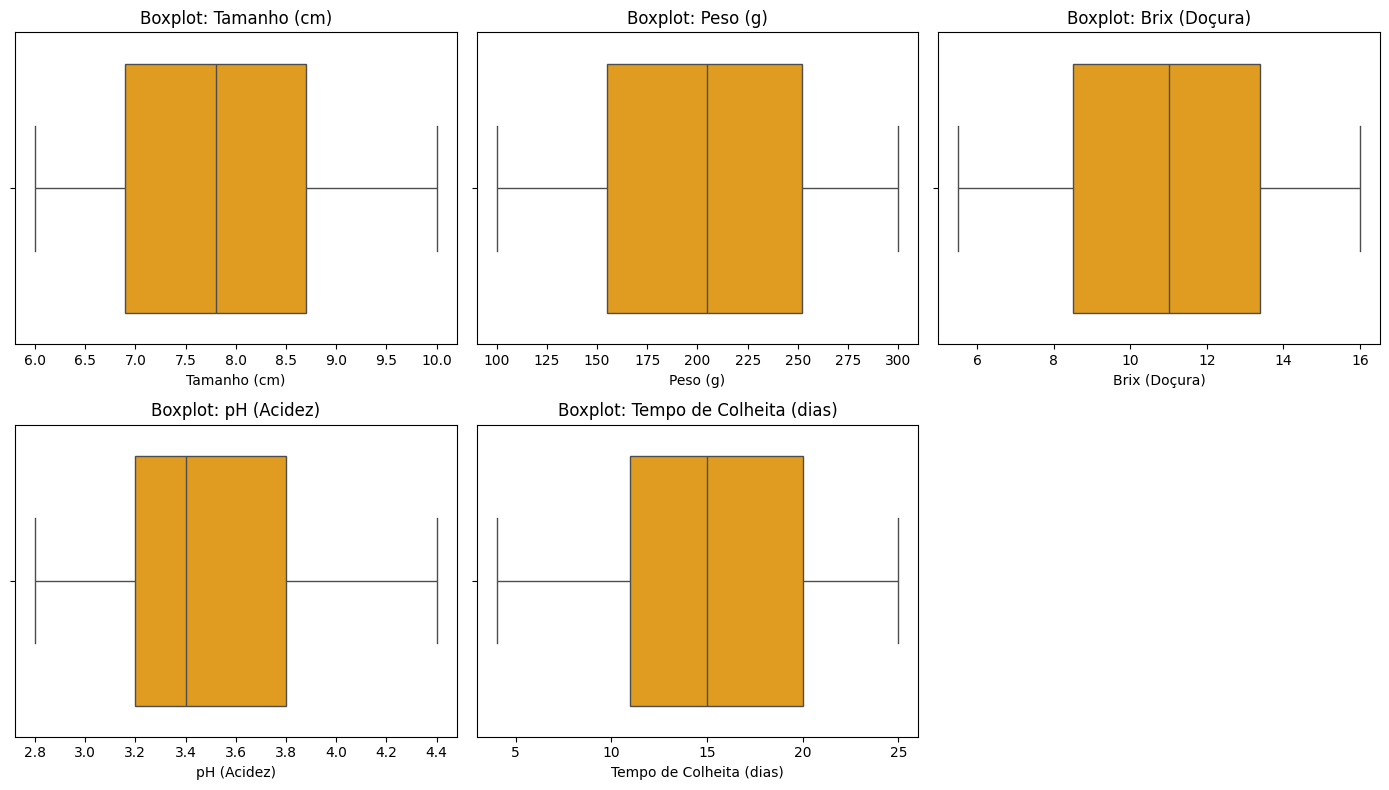

In [ ]:
# @title Regra do intervalo interquartil (IQR)
variaveis_qualitativas = df_dict.query("tipo == 'quantitativa'").variavel.tolist()

outliers_dict = {}
for col in variaveis_qualitativas:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers_dict[col] = outliers

    print(f'Coluna: {col} - Total de outliers: {len(outliers)}')

# visualizando outliers com boxplots
plt.figure(figsize=(14, 8))
for i, col in enumerate(variaveis_qualitativas, 1):
    plt.subplot(2, (len(variaveis_qualitativas)+1)//2, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [ ]:
# @title Métrica z-score
quantitative_variables = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

z_scores = np.abs(zscore(df[quantitative_variables]))

outlier_mask = (z_scores > 3).any(axis=1)

print("Outliers encontrados:", outlier_mask.sum())

Outliers encontrados: 0


---

Sem outliers detectados.

---

In [ ]:
print(df.duplicated().sum())

0


---

Não há dados duplicados.

---

#### Transformação de dados

In [ ]:
target_variable = ['Qualidade (1-5)']

nominal_variables = (
    df_dict
    .query("subtipo == 'nominal'")
    .variavel
    .to_list()
)

ordinal_variables = (
    df_dict
    .query("subtipo == 'ordinal'and variavel not in @target_variable")
    .variavel
    .to_list()
)

continuous_variables = (
    df_dict
    .query("subtipo == 'contínua'")
    .variavel
    .to_list()
)

discrete_variables = (
    df_dict
    .query("subtipo == 'discreta'")
    .variavel
    .to_list()
)
print(nominal_variables)
print(ordinal_variables)
print(continuous_variables)
print(discrete_variables)

['Cor', 'Variedade', 'Manchas (S/N)']
['Maciez (1-5)', 'Maturação (1-5)']
['Tamanho (cm)', 'Peso (g)', 'Brix (Doçura)', 'pH (Acidez)']
['Tempo de Colheita (dias)']


In [ ]:
# @title Separação entre Variáveis Preditora e Alvo
X = df.drop(columns=target_variable)
y = df[target_variable]

print(X.shape)
print(y.shape)

(241, 10)
(241, 1)


#### Codificação e normalização de variáveis

As transformações aplicadas nas variáveis seguem a seguinte configuração:

#### Variáveis quantitativas
 - **Discretas e contínuas**: normalização min-max.

#### Variáveis qualitativas
 - **Ordinais**: codificação via *ordinal encoding*.
 - **Nominais**: codificação via *one-hot encoding*.

In [ ]:

# variáveis discretas
discrete_preprocessing = Pipeline(steps=[
    # tratamento de dados discrepantes
    ("normalization",  MinMaxScaler())# normalização
])
# variáveis contínuas
continuous_preprocessing = Pipeline(steps=[
    # tratamento de dados discrepantes
    ("normalization",  MinMaxScaler())# normalização
])
# variáveis ordinal
ordinal_preprocessing = Pipeline(steps=[
    ("encoding", OrdinalEncoder(categories=[[1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.], [1., 2., 2.5, 3., 3.5, 4., 4.5, 5.]]))
])
# variáveis nominais
nominal_preprocessing = Pipeline(steps=[
    ("encoding", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"))
])


In [ ]:
preprocessing = ColumnTransformer(transformers=[
    ("ordinal", ordinal_preprocessing, ordinal_variables),
    ("nominal", nominal_preprocessing, nominal_variables),
    ("discrete", discrete_preprocessing, discrete_variables),
    ("continuous", continuous_preprocessing, continuous_variables),
])


In [ ]:
processed_df = preprocessing.fit_transform(df)

In [ ]:
processed_df

,ordinal__Maciez (1-5),ordinal__Maturação (1-5),nominal__Cor_Deep Orange,nominal__Cor_Light Orange,nominal__Cor_Orange,nominal__Cor_Orange-Red,nominal__Cor_Yellow-Orange,nominal__Variedade_Ambiance,nominal__Variedade_Blood Orange,nominal__Variedade_California Valencia,...,nominal__Manchas (S/N)_Y (Mold Spot),nominal__Manchas (S/N)_Y (Scars),nominal__Manchas (S/N)_Y (Split Skin),nominal__Manchas (S/N)_Y (Sunburn Patch),nominal__Manchas (S/N)_Y (Sunburn),discrete__Tempo de Colheita (dias),continuous__Tamanho (cm),continuous__Peso (g),continuous__Brix (Doçura),continuous__pH (Acidez)
0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.3,0.4,0.4,0.6,0.2
1,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.6,0.5,0.4
2,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.2,0.8,0.1
3,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.8,0.8,0.3,0.6
4,3.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.6,0.6,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.4,0.5,0.5,0.5,0.5
237,8.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.4,0.9,0.3,0.4
238,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.5,1.0,0.1
239,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.9,0.3,0.8,0.4,0.9


### Modelagem

Para garantir uma avaliação robusta e confiável do desempenho dos modelos, foi utilizada a técnica de validação cruzada do tipo *Monte Carlo (ShuffleSplit)*, com 30 repetições, 20% dos dados para teste em cada divisão e uma semente aleatória fixa (random_state=42) para reprodutibilidade dos resultados. Essa abordagem consiste em gerar várias divisões aleatórias dos dados, treinando e testando os modelos em diferentes subconjuntos, o que permite avaliar a variabilidade da performance de forma mais abrangente do que uma única divisão ou o tradicional K-Fold.

A escolha dos hiperparâmetros foi feita por meio de *RandomizedSearchCV*, que explora aleatoriamente combinações pré-definidas de forma eficiente. Para a regressão linear, não foi necessário ajuste de hiperparâmetros. Nos demais casos, foram testadas 10 combinações com validação cruzada interna de 5 divisões.

---

*Modelos de Regressão:*

- Linear Regression (LRG): modelo linear clássico, utilizado como baseline, sem ajuste de hiperparâmetros.

- K-Nearest Neighbors Regressor (KNN): modelo baseado na proximidade entre amostras, com ajuste do número de vizinhos, pesos e tipo de distância.

- Decision Tree Regressor (DTR): modelo baseado em árvores de decisão, ajustando a profundidade máxima e o número de atributos considerados.

- Support Vector Regressor (SVR): modelo robusto a outliers, testando diferentes valores de regularização, margem de erro e tipos de kernel.

- Gradient Boosting Regressor (GBR): modelo de ensemble que constrói sucessivas árvores para melhorar o desempenho.

- Random Forest Regressor (RFR): modelo baseado em uma coleção de árvores de decisão.

*Métricas de Avaliação (Regressão):*

- MAE (Mean Absolute Error): erro médio absoluto entre os valores reais e previstos.

- MSE (Mean Squared Error): erro quadrático médio, penalizando mais os erros extremos.

- R² (Coeficiente de Determinação): proporção da variância explicada pelo modelo.

- MAPE (Mean Absolute Percentage Error): erro percentual absoluto, útil para interpretação relativa dos erros.

---

*Modelos de Classificação:*

- Logistic Regression (LR): modelo linear para problemas binários, robusto e interpretável.

- K-Nearest Neighbors Classifier (KNN): classifica com base na maioria dos vizinhos mais próximos.

- Support Vector Classifier (SVC): modelo eficaz para margens amplas e separações não lineares.

- Random Forest Classifier (RFC): ensemble de árvores de decisão.

- Decision Tree Classifier (DTC): classificação por meio de árvores de decisão.

*Métricas de Avaliação (Classificação):*

- Acurácia: proporção de previsões corretas.

- Precisão: proporção de positivos preditos que são realmente positivos.

- Recall: proporção de positivos reais que foram corretamente identificados.

- F1-Score: média harmônica entre precisão e recall, útil em dados desbalanceados.


#### Regressão

In [ ]:
# @title Implementação dos modelos de Regressão

modelos = [
    {
        "nome": "LRG",  # Linear Regression (baseline)
        "objeto": LinearRegression(),
        "hp": {}  # Sem hiperparâmetros ajustáveis aqui
    },
    {
        "nome": "KNN",  # K-Nearest Neighbors Regressor
        "objeto": KNeighborsRegressor(),
        "hp": {
            'n_neighbors': np.arange(1, 31, 5),  # Número de vizinhos
            'weights': ['uniform', 'distance'],  # Tipo de peso
            'p': [1, 2]  # Distância de Manhattan (1) ou Euclidiana (2)
        }
    },
    {
        "nome": "DTR",  # Decision Tree Regressor
        "objeto": DecisionTreeRegressor(random_state=42),
        "hp": {
            'max_depth': [None] + list(np.arange(2, 20, 4)),  # Profundidade máxima
            'max_features': [None, 'sqrt', 'log2']  # Seleção de features
        }
    },
    {
        "nome": "SVR",  # Support Vector Regressor
        "objeto": SVR(),
        "hp": {
            'C': np.logspace(-3, 3, 10),       # Regularização
            'epsilon': np.logspace(-4, 0, 10), # Margem de tolerância
            'kernel': ['linear', 'rbf', 'sigmoid']  # Tipo de kernel
        }
    },
    {
        "nome": "GBR",  # Gradient Boosting Regressor
        "objeto": GradientBoostingRegressor(random_state=42),
        "hp": {
            'n_estimators': [50, 100, 200],         # Número de árvores
            'learning_rate': [0.01, 0.1, 0.2],      # Taxa de aprendizado
            'max_depth': [3, 5, 7]                  # Profundidade das árvores
        }
    },
    {
        "nome": "RFR",  # Random Forest Regressor
        "objeto": RandomForestRegressor(random_state=42),
        "hp": {
            'n_estimators': [100, 200, 300],            # Número de árvores
            'max_depth': [None, 10, 20, 30],            # Profundidade máxima
            'min_samples_split': [2, 5, 10],            # Mínimo para split
            'min_samples_leaf': [1, 2, 4],              # Mínimo por folha
            'max_features': ['sqrt', 'log2', None]      # Subconjunto de features
        }
    }
]

In [ ]:
# @title Aplicação da validação cruzada
cv = ShuffleSplit(n_splits=30, test_size=.2, random_state=42)

metrics = {
    'neg_mean_absolute_error': 'MAE',
    'neg_mean_squared_error': 'MSE',
    'r2': 'R2',
    'neg_mean_absolute_percentage_error': 'MAPE'
}

results = []
# aplica validação cruzada em todos os modelos
for modelo in modelos:
    # aplicar random search
    random_search = RandomizedSearchCV(
        estimator=modelo["objeto"],
        param_distributions=modelo["hp"],
        n_iter=1 if modelo["nome"] == "LRG" else 10, # Número de combinações de parâmetros a testar
        scoring='neg_mean_squared_error',  # Métrica de avaliação
        cv=5, # Número de divisões para validação cruzada
        random_state=42, # Reprodutibilidade
        n_jobs=-1 # Paralelismo
    )
    # aplica validação cruzada
    approach = Pipeline(steps=[
        ("preprocessing", preprocessing),
        ("model", random_search)
    ])
    metric_results = cross_validate(approach, X=X, y=y.values.ravel(), cv=cv, scoring=list(metrics.keys()))
    # adiciona o nome do modelo ao dicionário de resultados
    metric_results['modelo'] = [modelo["nome"]] * len(metric_results['fit_time'])
    # adiciona os novos resultados a lista final de resultados
    results.append(pd.DataFrame(metric_results))
final_results = pd.concat(results, axis=0)

In [ ]:
# @title Apresentação de resultados

# função para hilight de melhores resultados
def highlight_best(s, props=''):
    if s.name[1] != 'std':
        if s.name[0].endswith('time'):
            return np.where(s == np.min(s.values), props, '')
        if s.name[0].endswith('R2'):
            return np.where(s == np.max(s.values), props, '')
        return np.where(s == np.min(s.values), props, '')

# atualização de valores das métricas
for metric in metrics.keys():
    if 'neg' in metric:
        final_results[f"test_{metric}"] *= -1


# apresentação de resultados
(
    final_results
    .rename(columns={f"test_{name}": value for name, value in metrics.items()})
    .groupby("modelo").agg(["mean", "std"]).T
    .style
    .apply(highlight_best, props='color:white;background-color:gray;font-weight: bold;', axis=1)
    .set_table_styles([{'selector': 'td', 'props': 'text-align: center;'}])
)

A tabela acima apresenta os resultados médios de desempenho dos modelos testados: *Decision Tree Regressor* (DTR), *Gradient Boosting Regressor* (GBR), *K-Nearest Neighbors* (KNN), *Linear Regression* (LRG), *Random Forest Regressor* (RFR) e *Support Vector Regressor* (SVR). As métricas avaliadas incluem MAE, MSE, R² e MAPE, além dos tempos de treinamento e predição.

O modelo que apresentou melhor desempenho geral foi o *Random Forest Regressor* (RFR), destacando-se com:

- o menor MAE (0.452455),

- o menor MSE (0.444028),

- o maior R² (0.549476),

- e o menor MAPE (0.178521).

Apesar de seu alto custo computacional, com o maior tempo de treinamento médio, seus resultados indicam uma maior capacidade preditiva em relação aos demais modelos.

O *Gradient Boosting Regressor* (GBR) também teve desempenho sólido, com o menor tempo de treino e bons resultados em todas as métricas, sendo o segundo melhor modelo em todas as métricas.

O *Linear Regression* (LRG) teve desempenho competitivo, especialmente no MSE e R², superando modelos mais simples como DTR e KNN.

Já o *Decision Tree Regressor* (DTR) e o KNN apresentaram resultados mais modestos, indicando menor capacidade de explicação da variância da variável alvo.

Por fim, o *Support Vector Regressor* (SVR) mostrou resultados intermediários, com desempenho próximo ao GBR.

#### Classificação

In [ ]:
# Arredonda números da variável-alvo para inteiros e separa classes para classificação
label_encoder = LabelEncoder()
y_encoder_round = label_encoder.fit_transform(df['Qualidade (1-5)'].round().clip(1, 5))

In [ ]:
# @title Implementação dos modelos de Classificação
modelos_class = [
    {
        "nome": "Logistic Regression",
        "objeto": LogisticRegression(max_iter=1000, random_state=42),
        "hp": {
            "C": np.logspace(-2, 1, 4),
            "penalty": ["l2"],
            "solver": ["lbfgs", "saga"]
        }
    },
    {
        "nome": "Decision Tree",
        "objeto": DecisionTreeClassifier(random_state=42),
        "hp": {
            "max_depth": [None] + list(np.arange(4, 21, 4)),
            "min_samples_split": np.arange(2, 11, 4),
            "criterion": ["gini", "entropy", "log_loss"]
        }
    },
    {
        "nome": "Random Forest",
        "objeto": RandomForestClassifier(random_state=42),
        "hp": {
            "n_estimators": np.arange(100, 301, 100),
            "max_depth": [None] + list(np.arange(10, 41, 10)),
            "min_samples_split": np.arange(2, 7, 2),
            "criterion": ["gini", "entropy"]
        }
    },
    {
        "nome": "SVC",
        "objeto": SVC(),
        "hp": {
            "C": np.logspace(-1, 1.5, 4),
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto"]
        }
    },
    {
        "nome": "k-NN",
        "objeto": KNeighborsClassifier(),
        "hp": {
            "n_neighbors": np.arange(3, 16, 2),
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan", "minkowski"]
        }
    }
]


In [ ]:
# @title Aplicação da validação cruzada
cv = ShuffleSplit(n_splits=30, test_size=.2, random_state=42)

metrics_class = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0)
}

results = []
# aplica validação cruzada em todos os modelos
for modelo in modelos_class:
    # aplicar random search
    random_search = RandomizedSearchCV(
        estimator=modelo["objeto"],
        param_distributions=modelo["hp"],
        n_iter=1 if modelo["nome"] == "LRG" else 10, # Número de combinações de parâmetros a testar
        scoring='f1_macro',  # Métrica de avaliação
        cv=5, # Número de divisões para validação cruzada
        random_state=42, # Reprodutibilidade
        n_jobs=-1 # Paralelismo
    )
    # aplica validação cruzada
    approach = Pipeline(steps=[
        ("preprocessing", preprocessing),
        ("model", random_search)
    ])
    metric_results = cross_validate(approach, X=X, y=y_encoder_round, cv=cv, scoring=metrics_class)
    # adiciona o nome do modelo ao dicionário de resultados
    metric_results['modelo'] = [modelo["nome"]] * len(metric_results['fit_time'])
    # adiciona os novos resultados a lista final de resultados
    results.append(pd.DataFrame(metric_results))
final_class_results = pd.concat(results, axis=0)

In [ ]:
# @title Apresentação de resultados

# função para highlight de melhores resultados
def highlight_best(s, props=''):
    if s.name[1] != 'std':
        if s.name[0].endswith('time'):
            return np.where(s == np.min(s.values), props, '')
        if s.name[0] in ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']:
            return np.where(s == np.max(s.values), props, '')
        return np.where(s == np.min(s.values), props, '')

# apresentação de resultados
(
    final_class_results
    .rename(columns={
        f"test_accuracy": "Acurácia",
        f"test_precision": "Precisão",
        f"test_recall": "Revocação",
        f"test_f1": "F1-Score"
    })
    .groupby("modelo").agg(["mean", "std"]).T
    .style
    .apply(highlight_best, props='color:white;background-color:gray;font-weight: bold;', axis=1)
    .set_table_styles([{'selector': 'td', 'props': 'text-align: center;'}])
)




A tabela apresenta os resultados médios dos modelos de classificação: *Decision Tree*, *Logistic Regression*, *Random Forest*, *Support Vector Machine (SVM)* e *k-Nearest Neighbors (k-NN)*. Foram avaliadas as métricas de **Acurácia**, **Precisão**, **Revocação** e **F1-Score**, além dos tempos de treinamento e predição.

O modelo com melhor desempenho geral foi o **Random Forest**, destacando-se em **todas as métricas de classificação**:
- **Maior Acurácia** (**0.713605**),
- **Maior Precisão** (**0.569153**),
- **Maior F1-Score** (**0.473864**),
- e desempenho competitivo em Revocação (**0.463372**).

Apesar de apresentar o **maior tempo de treinamento** (**18.17s**), seu ganho em desempenho compensa o custo computacional, especialmente para tarefas onde a qualidade preditiva é mais importante que a velocidade.

O modelo **SVM** apresentou resultados sólidos, com **Revocação ligeiramente superior** (**0.488256**) e **Acurácia** de **0.672109**, ficando logo atrás do Random Forest em desempenho geral.

A **Logistic Regression** também teve bom desempenho, sendo o modelo com **menor desvio padrão** na maioria das métricas e **boa acurácia** (**0.693878**), além de um tempo de treinamento significativamente menor que o Random Forest.

Já o **Decision Tree** e o **k-NN** foram os modelos com os piores desempenhos, com **F1-Scores abaixo de 0.45** e **acurácia inferior a 0.65**, embora se destaquem por seus baixos tempos de execução.



## Resultados e discussão

Após testarmos diversas abordagens para prever a qualidade das laranjas, tanto como um problema de regressão quanto como um de classificação, observamos que o modelo Random Forest obteve o melhor desempenho em ambas as abordagens.

Na regressão, o Random Forest apresentou os melhores resultados em todas as métricas principais `(MAE, MSE, R², MAPE)`, indicando uma boa capacidade de prever a nota atribuída à qualidade da laranja.
Na classificação, o mesmo modelo se destacou por alcançar os maiores valores de `Acurácia, Precisão e F1-Score`, além de manter um desempenho robusto em `Revocação`.

Esse desempenho superior em ambas as frentes pode ser explicado por algumas características da técnica de Random Forest:

- Combinação de múltiplas árvores: o modelo se beneficia da média de várias árvores decisórias, reduzindo o risco de overfitting típico de árvores individuais e aumentando a robustez geral da predição.

- Redução de variância: ao trabalhar com múltiplos subconjuntos dos dados, o modelo consegue capturar relações mais complexas sem perder a generalização.

- Adaptabilidade a diferentes tipos de variáveis e escalas: o Random Forest lida bem com datasets heterogêneos e com ruído.

Em conclusão, os resultados obtidos indicam que a previsão da qualidade das laranjas pode ser abordada de forma eficaz tanto como um problema de regressão quanto de classificação e que o modelo Random Forest é uma escolha eficaz independentemente da abordagem adotada.